<a href="https://colab.research.google.com/github/satishchaudhary382/algorithmic-trading-with-python/blob/master/SS%2BAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!pip install pandas_ta
!pip install MarketProfile
!pip install fake-useragent
!pip install mpl_finance

In [19]:
import datetime
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
from fake_useragent import UserAgent
import requests

from selenium import webdriver
from market_profile import MarketProfile
import random
import pandas_ta as ta
useragent = UserAgent()
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
import bokeh
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import altair as alt
from math import pi
from bokeh.io import output_notebook
from bokeh.models import Label
from datetime import datetime as dt
# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()
%matplotlib inline
from math import pi
from bokeh.models import Span
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import pandas_datareader as pdr
import time
from bs4 import BeautifulSoup

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

In [ ]:
#@title
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument(f"user-agent = {useragent.random}")
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

delay = 10

url = "https://merolagani.com/CompanyDetail.aspx?symbol=nhpc"
wait = WebDriverWait(driver, 10)
driver.get(url)

price = wait.until(EC.element_to_be_clickable((By.XPATH,"//a[@title='Price History']")))
price.click()
time.sleep(5)


tables = driver.find_element_by_xpath("//table[@class='table table-bordered table-striped table-hover']")
driver.execute_script("window.open(arguments[0], '_blank');", tables)

data = []
data1 = []
data2 = []
a = 1
delay = 5

l = [range(2,102),range(2,99)]
while a<3:
  for i in l:
    # frame = driver.find_element_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_CompanyDetail1_divDataPrice"]/div[2]')
    # driver.switch_to.frame(frame)
    try:
      for j in i:
        WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.ID, 'ctl00_ContentPlaceHolder1_CompanyDetail1_divDataPrice')))
        # c = len(driver.find_element_by_xpath(f'//*[@id="ctl00_ContentPlaceHolder1_CompanyDetail1_divDataPrice"]/div[2]/table/tbody/tr[{j}]'))
        d = driver.find_element_by_xpath(f'//*[@id="ctl00_ContentPlaceHolder1_CompanyDetail1_divDataPrice"]/div[2]/table/tbody/tr[{j}]')
        data2.append(d.text)
      driver.find_elements_by_xpath('//*[@title="Next Page"]')[0].click()
      # next.click()
      time.sleep(5)
      a+=1
    except:
      pass
  
  # driver.find_elements_by_xpath('//*[@title="Next Page"]')[0].click()
  #   # next.click()
  # time.sleep(5)
  # a+=1


driver.quit()

In [51]:
lists = ['sindu']
# lists = ['gilb','nmfbs','smfbs','albsl','vlbs','uslb','gmfbs','ddbl','fowad','jslbb','nadep','snlb','msmbs','mlbbl','glbsl','sabsl']
for name in lists:

  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  chrome_options.add_argument(f"user-agent = {useragent.random}")
  wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)


  from selenium.webdriver.support.ui import WebDriverWait
  from selenium.webdriver.support import expected_conditions as EC
  from selenium.webdriver.common.by import By

  url = f"https://www.sharesansar.com/company/{name}"
  wait = WebDriverWait(driver, 10)
  driver.get(url)
  wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="btn_cpricehistory"]'))).click()

  # driver.find_element_by_xpath('//*[@id="btn_cpricehistory"]').click()
  time.sleep(2)

  # driver.find_element_by_div("table table-bordered table-striped table-hover")
  data = []
  a = 1
  try:
    while a<7:
      
      for i in range(1,21):
        for j in range(1,9):
          d = driver.find_element_by_xpath(f'//*[@id="myTableCPriceHistory"]/tbody/tr[{i}]/td[{j}]')
          data.append(d.text)

      a +=1
      driver.find_element_by_xpath('//*[@id="myTableCPriceHistory_next"]').click()#f'//*[@id="myTableCPriceHistory_paginate"]/span/a[{a}]').click()
      print(f"Scraped page {a} of {name}")
      time.sleep(1)
  except:
    print("Error scraping")

        # driver.find_element_by_xpath('//*[@id="myTableCPriceHistory"]/tbody/tr[1]').text
    # //*[@id="myTableCPriceHistory"]/tbody/tr[1]/td[1]
  driver.quit()

  Date = [data[i] for i in range(1, len(data),8)]
  Open = [float(data[i].replace(',', '')) for i in range(2, len(data),8)]
  High = [float(data[i].replace(',', '')) for i in range(3, len(data),8)]
  Low = [float(data[i].replace(',', '')) for i in range(4, len(data),8)]
  Close = [float(data[i].replace(',', '')) for i in range(5, len(data),8)]
  Volume = [float(data[i].replace(',', '')) for i in range(7, len(data),8)]
  Turnover = [float(data[i].replace(',', '')) for i in range(8, len(data),8)]
  final_df = {"Date": Date,
              "Open" : Open,
              "High" : High,
              "Low":Low,
              "Close":Close,
              "Volume": Volume, 
              }

  # import pandas as pd
  raw = pd.DataFrame(final_df)
  raw['Date'] = raw['Date'].apply(pd.to_datetime)
  raw['Open'] = raw['Open'].apply(pd.to_numeric)
  raw['High'] = raw['High'].apply(pd.to_numeric)
  raw['Low'] = raw['Low'].apply(pd.to_numeric)
  raw['Close'] = raw['Close'].apply(pd.to_numeric)

  raw.sort_values(by = "Date", ascending = True, inplace = True)
  raw.set_index("Date", inplace = True)
  raw.to_csv(f"/content/{name}_1.csv")


Scraped page 2 of sindu
Scraped page 3 of sindu
Scraped page 4 of sindu
Scraped page 5 of sindu
Scraped page 6 of sindu
Scraped page 7 of sindu


In [52]:
stock = 'sindu_1'
# !pip install finta

In [80]:
#@title SHA

def SHA(df, length):
  import warnings
  warnings.filterwarnings("ignore")
  
  import matplotlib.pyplot as plt
  from bokeh.plotting import figure, output_file, show
  import bokeh
  from math import pi
  from bokeh.io import output_notebook
  from bokeh.models import Label
  from datetime import datetime as dt
  # Call once to configure Bokeh to display plots inline in the notebook.
  output_notebook()
  %matplotlib inline
  from math import pi
  from bokeh.models import Span
  w_l = length
  df['O'],df['H'],df['L'],df['C']= ta.ema(df['Open'], w_l),ta.ema(df['High'], w_l),ta.ema(df['Low'], w_l),ta.ema(df['Close'], w_l)
  df = df.dropna()
  df['C_1'] = (df['O']+df['H']+df['L']+df['O'])/4
  O,C = [df['O'][0]],[df['C'][0]]
  o,c = df['O'].shift(-1),df['C'].shift(-1)
  t= (o+c)/2
  r = t.shift(1)
  r[np.isnan(r)]=df['O'][0]
  df['O_1'] = t
  df['H_1'] = df[['H','O_1']].max(axis=1)
  df['L_1'] = df[['L','O_1']].min(axis=1)
  df['O_2'] = ta.ema(df['O_1'],w_l)
  df['L_2'] = ta.ema(df['L_1'],w_l)
  df['H_2'] = ta.ema(df['H_1'],w_l)
  df['C_2'] = ta.ema(df['C_1'],w_l)
  # df['C_2'][-1] = df['C_1'][-1]
  # df = df.dropna()
# df = df[['O_2','H_2','L_2','C_2','Volume']]
  df = df.reset_index()
  return df[['Date','Open','High','Low','Close','O_2','H_2','L_2','C_2']]

In [81]:
#@title MArket Profile
from market_profile import MarketProfile

df = pd.read_csv(f"/content/{stock}.csv")

class Analysis:
  
  def __init__(self, dataframe):
    self.dataframe = dataframe
    self.profile = []
    self.levels = []
    self.level = []

  # Diagram for candle stick 
  def candlestick(self):
    return self.dataframe

  # Calculation of Market Profile
  def market_profile(self):
    for i in range(1,len(self.dataframe),20):
      try:
        mp = MarketProfile(self.dataframe)
        mp_slice = mp[self.dataframe.index[0+i]: self.dataframe.index[20+i]]
        self.profile.append(mp_slice.poc_price)
      except:
        pass
    return self.profile


a = Analysis(df)


b = a.market_profile()

In [82]:
#@title TRIMA band
def trima(df):
  df['trima'] = ta.trima(df['Close'],21)
  df['range'] = ta.atr(df.High, df.Low, df.Close, 14) * 4
  df['H'] = ta.wma((df['trima'] + df['range']),21)
  df['L'] = ta.wma((df['trima'] - df['range']),21)
  df['SD_UP'] = df['H'].rolling(20).std()
  # df['SD_DOWN'] = ((df['trima'] - df['range'])).rolling(20).std()
  df['HH'] = ta.wma((df['trima'] + df['range']),21)+(ta.atr(df.High, df.Low, df.Close,21))*1
  df['LL'] = ta.wma((df['trima'] - df['range']),21)-(ta.atr(df.High, df.Low, df.Close,21))*1
  return df[['HH','H','LL','L']]

In [88]:
def apz(df):
  # df['trima'] = ta.trima(df['Close'],21)
  df['U'] = TA.APZ(df)['UPPER']
  df['L'] = TA.APZ(df)['LOWER']
  # df['range'] = ta.atr(df.High, df.Low, df.Close, 14) * 4
  # df['H'] = ta.wma((df['U'] + df['range']),21)
  # df['L'] = ta.wma((df['L'] - df['range']),21)
  # df['SD_UP'] = df['H'].rolling(20).std()
  # df['SD_DOWN'] =df['L'].rolling(20).std()
  # df['HH'] = ta.wma((df['H'] + df['range']),21)+(ta.atr(df.High, df.Low, df.Close,21))*1
  # df['LL'] = ta.wma((df['L'] - df['range']),21)-(ta.atr(df.High, df.Low, df.Close,21))*1
  # return df[['HH','H','LL','L']]
  return df[['U',"L"]]
df = pd.read_csv("/content/sindu_1.csv")
df.set_index("Date", inplace = True)
apz(df)

,U,L
Date,,
2020-11-19,177.000000,157.000000
2020-11-22,178.970522,153.482993
2020-11-23,179.397659,150.279250
2020-11-24,181.072833,150.428485
2020-11-25,182.902394,151.258229
...,...,...
2021-05-09,284.911305,232.745643
2021-05-10,282.760221,231.015882
2021-05-11,281.108421,229.875462


In [83]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from finta import TA
import numpy as np
#Load data
df = pd.read_csv(f"/content/{stock}.csv")


df = df[df['Date']>"1-1-2021"]
df.set_index("Date", inplace = True)

v = df.copy() # for volatility
o = df.copy() # for OB/OS
efi = df.copy() # for EFI
basp = df.copy()
t = SHA(df,3)
dfs = trima(df)
m = SHA(df,5)

# Volitility 

v['macd'] = TA.MACD(v,9,19,6)['MACD']
v['signal'] = TA.MACD(v,9,19,6)['SIGNAL']
# v['squeeze'] = ta.squeeze(v.High,v.Low, v.Close, 20,1.6,20,1, lazybear = True)['SQZ_ON']
v['s'] = TA.SQZMI(v)
v['squeeze'] = v.apply(lambda x: 1 if x['s'] == True else 0, axis = 1)
v['stc'] = (TA.STC(v,23,50,3,3))*(v['Close'].max()/100)
mid = (v['Close'].max()*.5)
upp = (v['Close'].max()*.75)
low = (v['Close'].max()*.25)

# OB/OS
o['WT1'] = TA.WTO(df)['WT1.'] 
o['WT2'] = TA.WTO(df)['WT2.']

# Mass Index  : Used to indentify trend exhaustion and plotted on same graph of OB/OS
# mass['MI'] = TA.MI(df)
# EFI
efi['EFI'] = TA.EFI(efi)
efi['color'] = np.where(efi['EFI']<0, 'red', 'green')

# BAPS
basp['basp'] = TA.BASPN(basp)['Buy.'] - TA.BASPN(basp)['Sell.']
basp['color']  =np.where(basp['basp']>0, 'green', 'red')

# Create subplots and mention plot grid size
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, 
               vertical_spacing=0.05, 
               row_width=[0.2, 0.2,0.2,0.7]) # subplot_titles=(f'{stock}') if want to add title

# Candle stick chart
fig.add_trace(go.Candlestick(x=df.index,open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'], 
                             name = 'Candlestick',increasing_line_color= '#000000', decreasing_line_color= '#000000',
                             decreasing_fillcolor = "#FFFFFF", increasing_fillcolor = "#000000", 
                             increasing_line_width=1,decreasing_line_width=1), row=1, col=1)

#Heikin ashi chart 1
fig.add_trace(go.Candlestick(x=t['Date'],open=t['O_2'],high=t['C_2'],low=t['O_2'],close=t['C_2'], 
                             name = 'Trend Filter1',increasing_line_color= '#FF0000', decreasing_line_color= '#0D600D',
                             decreasing_fillcolor = "#0D600D", increasing_fillcolor = "#FF0000", 
                             increasing_line_width=1,decreasing_line_width=1), row=1,col=1)

#Heikin ashi chart 2
fig.add_trace(go.Candlestick(x=m['Date'],open=m['O_2'],high=m['C_2'],low=m['O_2'],close=m['C_2'], 
                             name = 'Trend Filter2',increasing_line_color= '#FF0000', decreasing_line_color= '#0D600D',
                             decreasing_fillcolor = "#0D600D", increasing_fillcolor = "#FF0000", 
                             increasing_line_width=1,decreasing_line_width=1), row=1,col=1)

# SR Volume Profile
for line in b:
  fig.add_trace(go.Scatter(x = dfs.index, y = pd.Series(np.array([line for _ in range(len(dfs))])), mode = 'lines', line = dict(color = "red", width = 1), name = "VP S/R"))

# Upper and Lower Resistance
fig.add_trace(go.Scatter(x=dfs.index, y=dfs.HH,fill=None, mode='lines',line_color='green',line=dict(color='green',width=1),opacity=0.3, name = "Upper Resistance 1"),row=1,col=1)
fig.add_trace(go.Scatter(x=dfs.index, y=dfs.H,fill='tonexty',mode='lines', line_color='green',line=dict(color='green',width=1),opacity=0.3,name = "Upper Resistance 2"),row=1,col=1)   
fig.add_trace(go.Scatter(x=dfs.index, y=dfs.LL,fill=None, mode='lines',line_color='red',line=dict(color='red',width=1), name = "Lower Support 1"),row=1,col=1)
fig.add_trace(go.Scatter(x=dfs.index, y=dfs.L,fill='tonexty',mode='lines', line_color='red',line=dict(color='red',width=1), name = "Lower Support 2"),row=1,col=1)

# Squeeze and STC
fig.add_trace(go.Scatter(x=v.index, y=v.Close,mode='markers',marker_color=v['squeeze'], marker_size = 6, name = 'Volatility & Momentum'), row=2, col=1)
fig.add_trace(go.Scatter(x=v.index, y=v['stc'] ,fill='tozeroy', line_color='black',line=dict(color='black',width=1), opacity = 0.4, name = 'Momentum'), row=2, col=1)
fig.add_trace(go.Scatter(x = v.index, y = pd.Series(np.array([mid for _ in range(len(v))])),mode = 'lines',line = dict(color= 'black', width = 1), name = 'Midline'), row = 2, col=1)
fig.add_trace(go.Scatter(x = v.index, y = pd.Series(np.array([upp for _ in range(len(v))])),mode = 'lines',line = dict(color= 'red', width = 1,dash='dot'), name = 'Upper-line'), row = 2, col=1)
fig.add_trace(go.Scatter(x = v.index, y = pd.Series(np.array([low for _ in range(len(v))])),mode = 'lines',line = dict(color= 'green', width = 1,dash='dot'), name = 'Lower-line'), row = 2, col=1)

#Over Bought and Over Sold along with Mass Index
fig.add_trace(go.Scatter(x = o.index, y = o['WT1'],fill =None, mode = 'lines',line_color='green',line=dict(color='green',width=1),name='WT1'), row = 3, col = 1)
fig.add_trace(go.Scatter(x = o.index, y = o['WT2'], mode = 'lines',line_color='red',line=dict(color='red',width=1),name='WT2'), row = 3, col = 1)
fig.add_trace(go.Scatter(x = o.index, y = pd.Series(np.array([0 for _ in range(len(o))])), mode = 'lines', line = dict(color = 'black', width =1, dash = 'dot'), name = 'Zero Line'), row = 3,col = 1)

fig.add_trace(go.Bar(name='Bull and Bear',x=basp.index,y=basp.basp,marker_color=basp['color']), row= 4, col = 1)



fig.update_layout(title = "Candlestick", yaxis_title ='Price',xaxis_rangeslider_visible=False,showlegend = False,barmode='stack', height=1000) #xaxis_title="Date"
fig.update_xaxes(showgrid=True,gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='gray')
fig.update_layout({'plot_bgcolor': '#FFFFFF','paper_bgcolor': '#FFFFFF'})

fig.show()

In [76]:
#@title SHA

def SHA(df, length):
  import warnings
  warnings.filterwarnings("ignore")
  
  import matplotlib.pyplot as plt
  from bokeh.plotting import figure, output_file, show
  import bokeh
  from math import pi
  from bokeh.io import output_notebook
  from bokeh.models import Label
  from datetime import datetime as dt
  # Call once to configure Bokeh to display plots inline in the notebook.
  output_notebook()
  %matplotlib inline
  from math import pi
  from bokeh.models import Span
  w_l = length
  df['O'],df['H'],df['L'],df['C']= ta.ema(df['Open'], w_l),ta.ema(df['High'], w_l),ta.ema(df['Low'], w_l),ta.ema(df['Close'], w_l)
  df = df.dropna()
  df['C_1'] = (df['O']+df['H']+df['L']+df['O'])/4
  O,C = [df['O'][0]],[df['C'][0]]
  o,c = df['O'].shift(-1),df['C'].shift(-1)
  t= (o+c)/2
  r = t.shift(1)
  r[np.isnan(r)]=df['O'][0]
  df['O_1'] = t
  df['H_1'] = df[['H','O_1']].max(axis=1)
  df['L_1'] = df[['L','O_1']].min(axis=1)
  df['O_2'] = ta.ema(df['O_1'],w_l)
  df['L_2'] = ta.ema(df['L_1'],w_l)
  df['H_2'] = ta.ema(df['H_1'],w_l)
  df['C_2'] = ta.ema(df['C_1'],w_l)
  df['C_2'][-1] = df['C_1'][-1]
  # df = df.dropna()
# df = df[['O_2','H_2','L_2','C_2','Volume']]
  df = df.reset_index()
  return df[['Date','Open','High','Low','Close','O_2','H_2','L_2','C_2']]

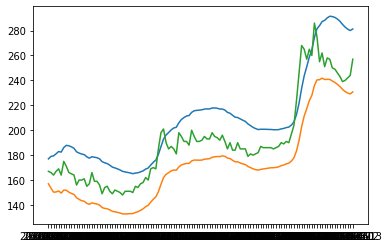

In [89]:
df = pd.read_csv("/content/sindu_1.csv")
df.set_index("Date", inplace = True)
plt.plot(TA.APZ(df)['UPPER'])
plt.plot(TA.APZ(df)['LOWER'])
plt.plot(df["Close"])